In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
from pathlib import Path

In [28]:
knownBest = Path().cwd() /  "solutions_from_known_best/traces"
heuristic = Path().cwd() /  "solutions_heuristic/traces"
rand = Path().cwd() /  "solutions_random/traces"

traces = [knownBest, heuristic, rand]

In [30]:
d = {"Iteration": int, "Basic Costs": int, "CS2 Costs": int, "CS3 Costs": int, "Total Costs": int, "Init": str, "Algorithm": str}
df = pd.DataFrame(columns=d.keys())

In [4]:
def read_files():
    d = {"Iteration": int, "Basic Costs": int, "CS2 Costs": int, "CS3 Costs": int, "Total Costs": int, "Init": str, "Algorithm": str}
    df = pd.DataFrame(columns=d.keys())
    for t in traces:
        for alg in t.glob("toy_*"):
            with open(alg, "r") as f:
                for it, line in enumerate(f.readlines()):
                    costs = re.findall("\d+", line)
                    init = [str(t).split("solutions_")[-1].split("/")[0]]
                    algo = [str(alg).split("toy_")[-1]]
                    df.loc[len(df.index)] = [it] + costs + init + algo

    df = df.astype(d)
    return df

#df = read_files()
#df.to_pickle("toy_traces.gz")
#df.head()

,Iteration,Basic Costs,CS2 Costs,CS3 Costs,Total Costs,Init,Algorithm
0,0,164,200,94,458,from_known_best,randomized_hill_climber
1,1,155,192,87,434,from_known_best,randomized_hill_climber
2,2,167,180,45,392,from_known_best,randomized_hill_climber
3,3,181,96,97,374,from_known_best,randomized_hill_climber
4,4,176,144,39,359,from_known_best,randomized_hill_climber


In [183]:
df = pd.read_pickle("toy_traces.gz")
df.head()

,Iteration,Basic Costs,CS2 Costs,CS3 Costs,Total Costs,Init,Algorithm
0,0,164,200,94,458,from_known_best,randomized_hill_climber
1,1,155,192,87,434,from_known_best,randomized_hill_climber
2,2,167,180,45,392,from_known_best,randomized_hill_climber
3,3,181,96,97,374,from_known_best,randomized_hill_climber
4,4,176,144,39,359,from_known_best,randomized_hill_climber


# Basics

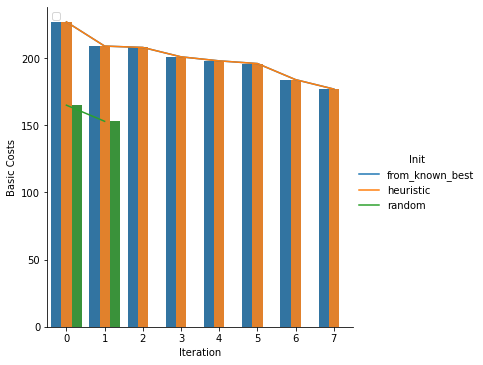

In [249]:
df2 = df.copy()
df2.drop(["Total Costs", "CS2 Costs", "CS3 Costs"], axis=1, inplace=True)
basic_hill_climber = sns.relplot(kind="line", x="Iteration", y="Basic Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])
basic_hill_climber = sns.barplot(x="Iteration", y="Basic Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])
basic_hill_climber.legend("")
basic_hill_climber.figure.savefig("plots/basic_hill_climber")
#total_hill_climber = sns.barplot(x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])

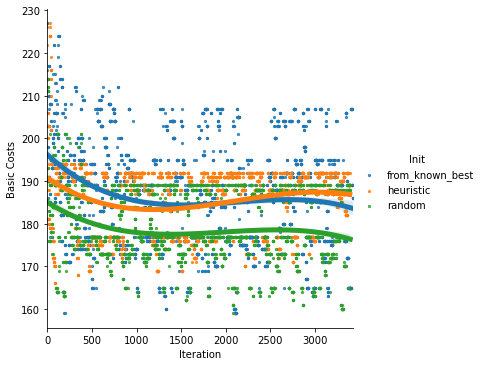

In [250]:
evo = df2.loc[df2["Algorithm"] == "evolutionary"]
basic_evo = sns.lmplot(x="Iteration", y="Basic Costs", markers=".", fit_reg=True, order=3, hue="Init", scatter_kws={"s": 20}, line_kws={"lw":5}, data=evo)
basic_evo.savefig("plots/basic_evo")

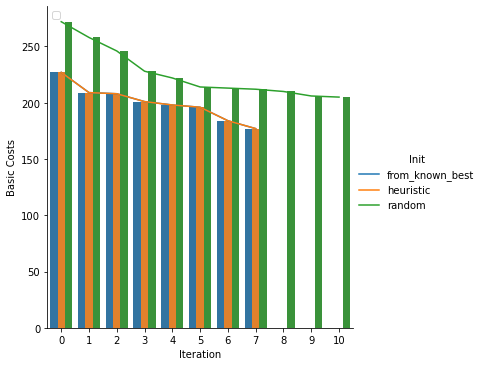

In [10]:
basic_vdns = sns.relplot(kind="line",x="Iteration", y="Basic Costs", hue="Init", data=df2.loc[df["Algorithm"] == "vdns"])
basic_vdns = sns.barplot(x="Iteration", y="Basic Costs", hue="Init", data=df2.loc[df["Algorithm"] == "vdns"])
basic_vdns.legend("")
basic_vdns.figure.savefig("plots/basic_vdns")

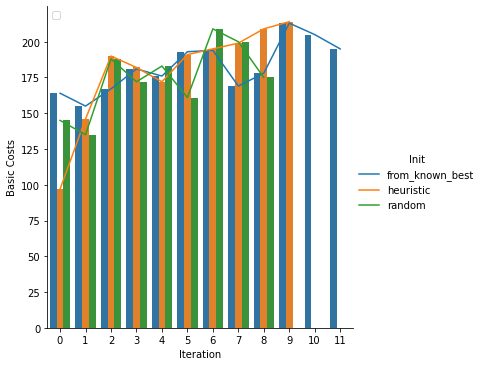

In [11]:
basic_random_hill_climber = sns.relplot(kind="line", x="Iteration", y="Basic Costs", hue="Init", data=df2.loc[df["Algorithm"] == "randomized_hill_climber"])
basic_random_hill_climber = sns.barplot(x="Iteration", y="Basic Costs", hue="Init", data=df2.loc[df["Algorithm"] == "randomized_hill_climber"])
basic_random_hill_climber.legend("")
basic_random_hill_climber.figure.savefig("plots/basic_random_hill_climber")

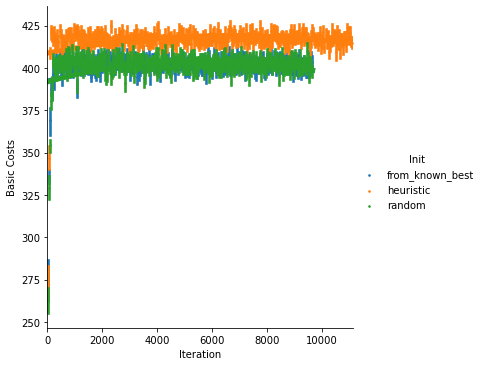

In [245]:
evo = df2.loc[df2["Algorithm"] == "simmulated_annealing"]
basic_evo = sns.lmplot(x="Iteration", y="Basic Costs", markers=".", x_bins=300,fit_reg=True, order=2, hue="Init", scatter_kws={"s": 10}, line_kws={"lw":5}, data=evo)
basic_evo.savefig("plots/basic_simmulated_annealing")

# CS3

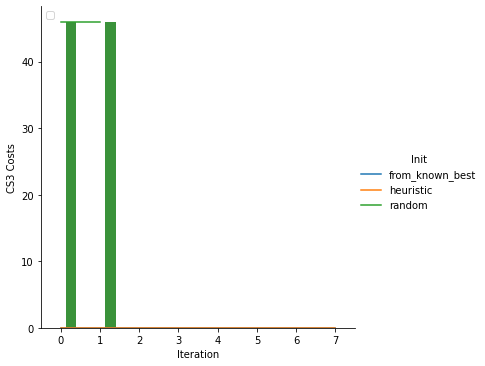

In [259]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS2 Costs"], axis=1, inplace=True)
cs3_hill_climber = sns.relplot(kind="line",x="Iteration", y="CS3 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])
cs3_hill_climber = sns.barplot(x="Iteration", y="CS3 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])
cs3_hill_climber.legend("")
cs3_hill_climber.figure.savefig("plots/cs3_hill_climber")
#total_hill_climber = sns.barplot(x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])

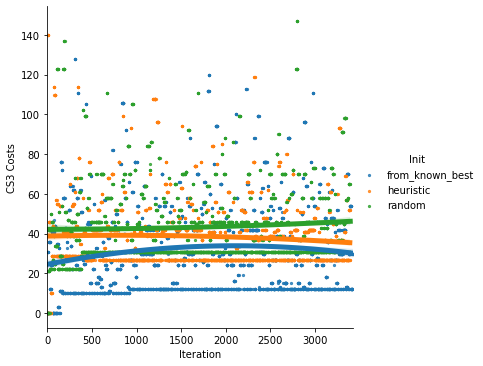

In [260]:
evo = df2.loc[df2["Algorithm"] == "evolutionary"]
basic_evo = sns.lmplot(x="Iteration", y="CS3 Costs", markers=".", fit_reg=True, order=2, hue="Init", scatter_kws={"s": 20}, line_kws={"lw":5}, data=evo)
basic_evo.savefig("plots/cs3_evo")

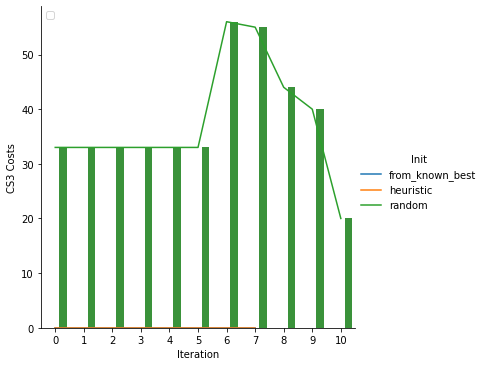

In [15]:
cs3_vdns = sns.relplot(kind="line", x="Iteration", y="CS3 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "vdns"], height=5)
cs3_vdns = sns.barplot(x="Iteration", y="CS3 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "vdns"])
cs3_vdns.legend("")
cs3_vdns.figure.savefig("plots/cs3_vdns")

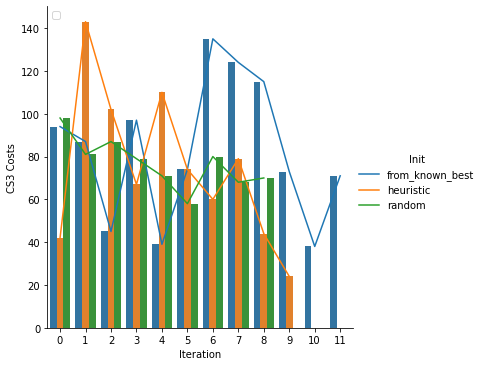

In [16]:
cs3_random_hill_climber = sns.relplot(kind="line", x="Iteration", y="CS3 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "randomized_hill_climber"])
cs3_random_hill_climber = sns.barplot(x="Iteration", y="CS3 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "randomized_hill_climber"])
cs3_random_hill_climber.legend("")
cs3_random_hill_climber.figure.savefig("plots/cs3_random_hill_climber")

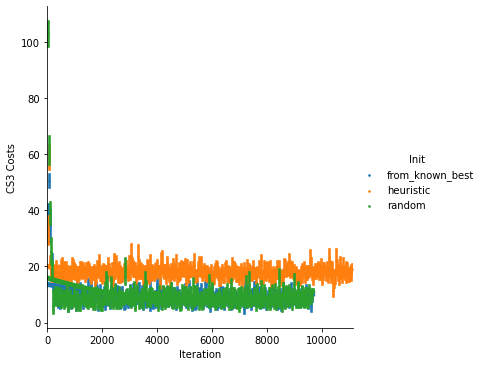

In [253]:
evo = df2.loc[df2["Algorithm"] == "simmulated_annealing"]
basic_evo = sns.lmplot(x="Iteration", y="CS3 Costs", markers=".", x_bins=300,fit_reg=True, order=2, hue="Init", scatter_kws={"s": 10}, line_kws={"lw":5}, data=evo)
basic_evo.savefig("plots/cs3_simmulated_annealing")

# CS2

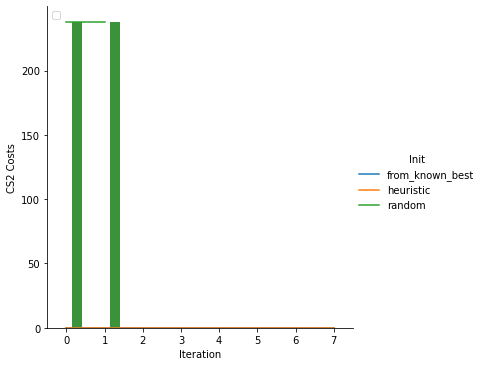

In [261]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
cs2_hill_climber = sns.relplot(kind="line", x="Iteration", y="CS2 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])
cs2_hill_climber = sns.barplot(x="Iteration", y="CS2 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])
cs2_hill_climber.legend("")
cs2_hill_climber.figure.savefig("plots/cs2_hill_climber")
#total_hill_climber = sns.barplot(x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])

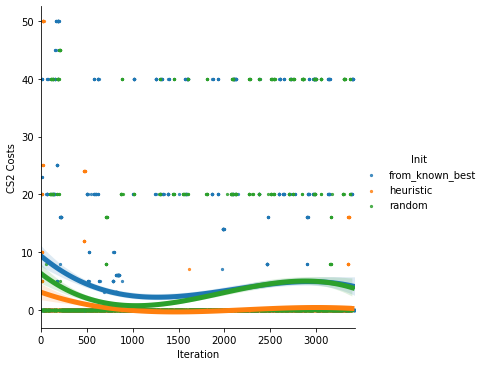

In [264]:
evo = df2.loc[df2["Algorithm"] == "evolutionary"]
basic_evo = sns.lmplot(x="Iteration", y="CS2 Costs", markers=".", fit_reg=True, order=3,hue="Init", scatter_kws={"s": 20}, line_kws={"lw":5}, data=evo)
basic_evo.savefig("plots/cs2_evo")

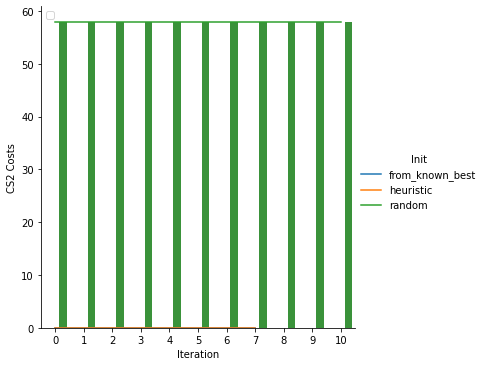

In [20]:
cs2_vdns = sns.relplot(kind="line",x="Iteration", y="CS2 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "vdns"])
cs2_vdns = sns.barplot(x="Iteration", y="CS2 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "vdns"])
cs2_vdns.legend("")
cs2_vdns.figure.savefig("plots/cs2_vdns")

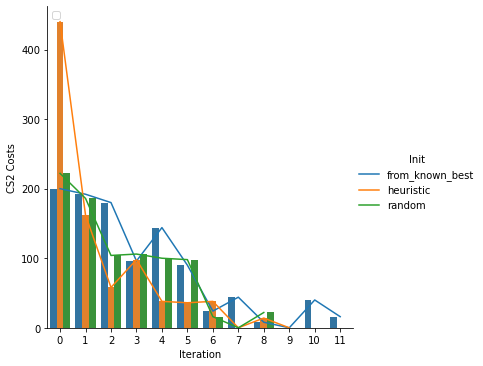

In [21]:
cs2_random_hill_climber = sns.relplot(kind="line", x="Iteration", y="CS2 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "randomized_hill_climber"])
cs2_random_hill_climber = sns.barplot(x="Iteration", y="CS2 Costs", hue="Init", data=df2.loc[df["Algorithm"] == "randomized_hill_climber"])
cs2_random_hill_climber.legend("")
cs2_random_hill_climber.figure.savefig("plots/cs2_random_hill_climber")

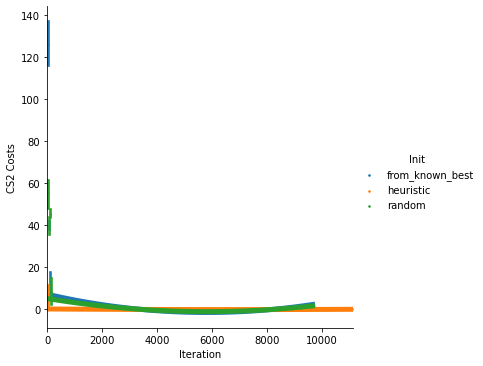

In [256]:
evo = df2.loc[df2["Algorithm"] == "simmulated_annealing"]
basic_evo = sns.lmplot(x="Iteration", y="CS2 Costs", markers=".", x_bins=300,fit_reg=True, order=2, hue="Init", scatter_kws={"s": 10}, line_kws={"lw":5}, data=evo)
basic_evo.savefig("plots/cs2_simmulated_annealing")

# Totals

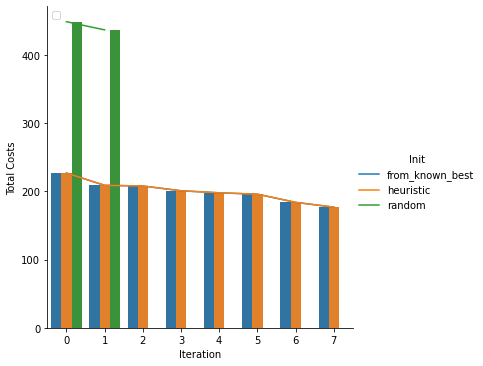

In [266]:
df2 = df.copy()
df2.drop(["Basic Costs", "CS2 Costs", "CS3 Costs"], axis=1, inplace=True)
total_hill_climber = sns.relplot(kind="line", x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])
total_hill_climber = sns.barplot(x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])
total_hill_climber.legend("")
total_hill_climber.figure.savefig("plots/total_hill_climber")
#total_hill_climber = sns.barplot(x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "hill_climber"])

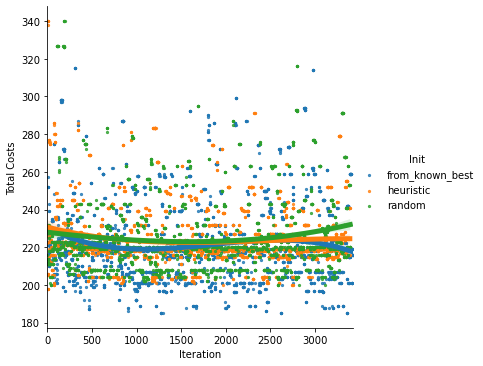

In [258]:
evo = df2.loc[df2["Algorithm"] == "evolutionary"]
basic_evo = sns.lmplot(x="Iteration", y="Total Costs", markers=".", fit_reg=True, order=3, hue="Init", scatter_kws={"s": 20}, line_kws={"lw":5}, data=evo)
basic_evo.savefig("plots/total_evo")

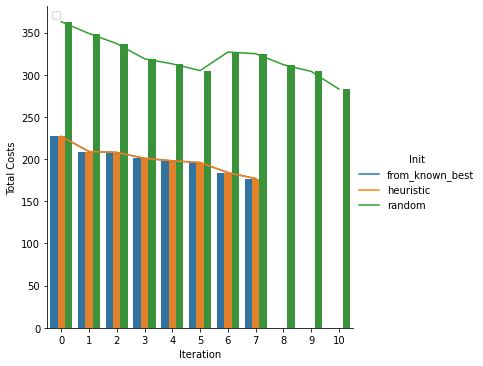

In [25]:
total_vdns = sns.relplot(kind="line", x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "vdns"])
total_vdns = sns.barplot(x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "vdns"])
total_vdns.legend("")
total_vdns.figure.savefig("plots/total_vdns")

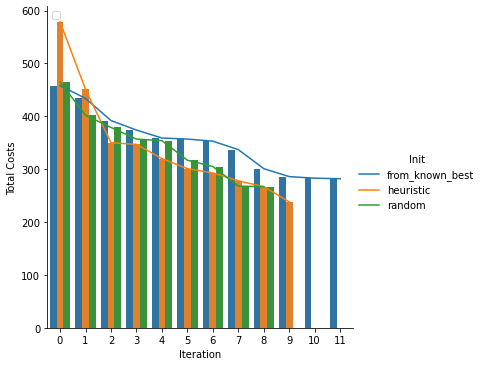

In [26]:
total_random_hill_climber = sns.relplot(kind="line", x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "randomized_hill_climber"])
total_random_hill_climber = sns.barplot(x="Iteration", y="Total Costs", hue="Init", data=df2.loc[df["Algorithm"] == "randomized_hill_climber"])
total_random_hill_climber.legend("")
total_random_hill_climber.figure.savefig("plots/total_random_hill_climber")

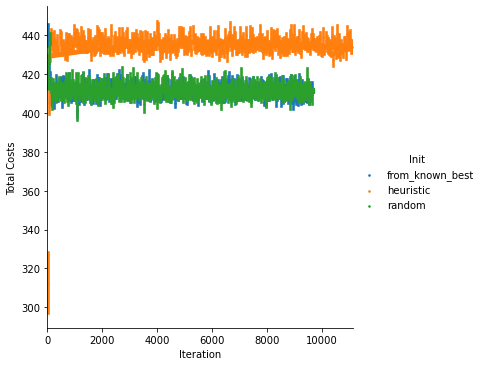

In [267]:
evo = df2.loc[df2["Algorithm"] == "simmulated_annealing"]
basic_evo = sns.lmplot(x="Iteration", y="Total Costs", markers=".", x_bins=300,fit_reg=True, order=2, hue="Init", scatter_kws={"s": 10}, line_kws={"lw":5}, data=evo)
basic_evo.savefig("plots/total_simmulated_annealing")

# Averages of many-run Toy

In [84]:
def read_files2():
    d = {"Iteration": int, "Basic Costs": int, "CS2 Costs": int, "CS3 Costs": int, "Total Costs": int, "Run": str, "Algorithm": str}
    df = pd.DataFrame(columns=d.keys())
    for t in list(Path("plots_traces").glob("toy_*")):
        alg = str(t).split("toy_")[-1]
        run = re.findall("r\d", alg)
        alg = alg.split("_r")[0]
        with open(t, "r") as f:
            for it, line in enumerate(f.readlines()):
                costs = re.findall("\d+", line)
                df.loc[len(df.index)] = [it] + costs + run + [alg]
    df = df.astype(d)
    return df

df = read_files2()
#df.to_pickle("toy_traces.gz")
df.head()

,Iteration,Basic Costs,CS2 Costs,CS3 Costs,Total Costs,Run,Algorithm
0,0,104,394,103,601,r1,randomized_hill_climber
1,1,124,270,58,452,r1,randomized_hill_climber
2,2,165,76,189,430,r1,randomized_hill_climber
3,3,148,140,123,411,r1,randomized_hill_climber
4,4,173,128,88,389,r1,randomized_hill_climber


## Basic Costs

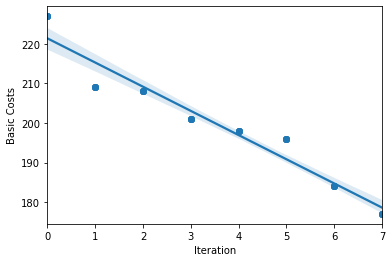

In [154]:
df2 = df.copy()
df2.drop(["Total Costs", "CS2 Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df["Algorithm"] == "hill_climber"]
hill_climber = sns.regplot(x="Iteration", y="Basic Costs", data=df2)

<AxesSubplot:xlabel='Iteration', ylabel='Basic Costs'>

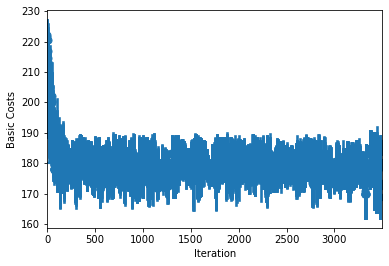

In [153]:
df2 = df.copy()
df2.drop(["Total Costs", "CS2 Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "evolutionary"]
sns.regplot(x="Iteration", y="Basic Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='Basic Costs'>

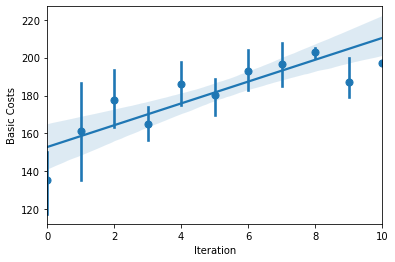

In [156]:
df2 = df.copy()
df2.drop(["Total Costs", "CS2 Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "randomized_hill_climber"]
sns.regplot(x="Iteration", y="Basic Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='Basic Costs'>

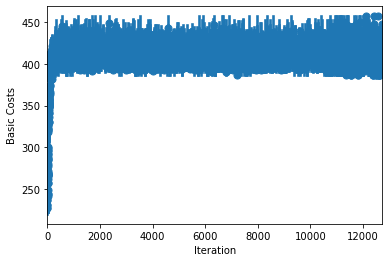

In [159]:
df2 = df.copy()
df2.drop(["Total Costs", "CS2 Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "simmulated_annealing"]
sns.regplot(x="Iteration", y="Basic Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='Basic Costs'>

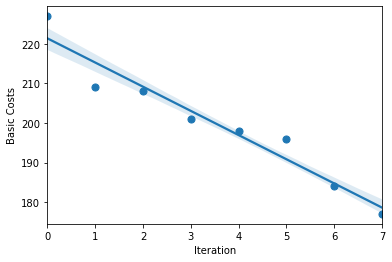

In [160]:
df2 = df.copy()
df2.drop(["Total Costs", "CS2 Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "vdns"]
sns.regplot(x="Iteration", y="Basic Costs", data=df2, x_estimator=np.mean)

## CS2

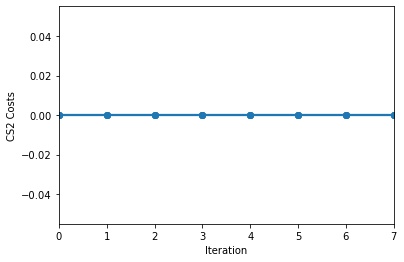

In [162]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df["Algorithm"] == "hill_climber"]
hill_climber = sns.regplot(x="Iteration", y="CS2 Costs", data=df2)

<AxesSubplot:xlabel='Iteration', ylabel='CS2 Costs'>

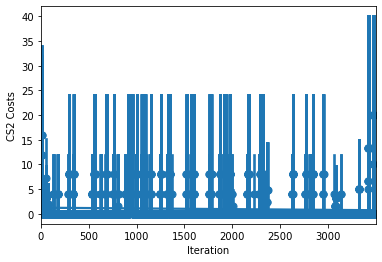

In [163]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "evolutionary"]
sns.regplot(x="Iteration", y="CS2 Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='CS2 Costs'>

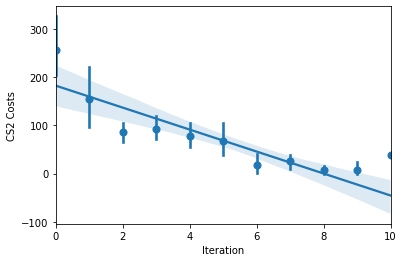

In [164]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "randomized_hill_climber"]
sns.regplot(x="Iteration", y="CS2 Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='CS2 Costs'>

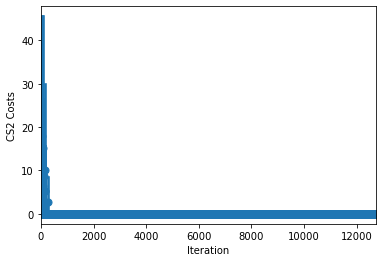

In [165]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "simmulated_annealing"]
sns.regplot(x="Iteration", y="CS2 Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='CS2 Costs'>

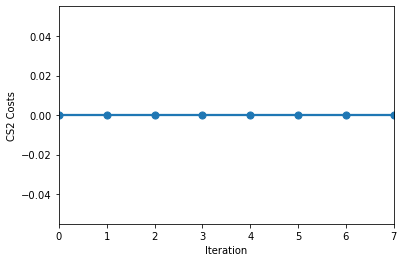

In [166]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "vdns"]
sns.regplot(x="Iteration", y="CS2 Costs", data=df2, x_estimator=np.mean)

## CS3

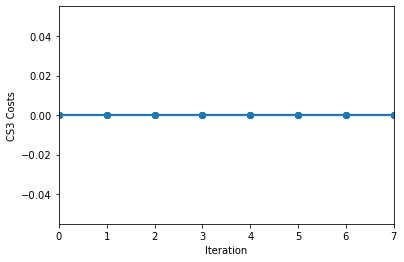

In [167]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS2 Costs"], axis=1, inplace=True)
df2 = df2.loc[df["Algorithm"] == "hill_climber"]
hill_climber = sns.regplot(x="Iteration", y="CS3 Costs", data=df2)

<AxesSubplot:xlabel='Iteration', ylabel='CS3 Costs'>

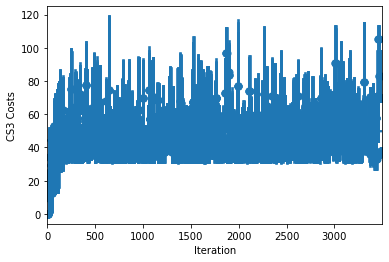

In [168]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS2 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "evolutionary"]
sns.regplot(x="Iteration", y="CS3 Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='CS3 Costs'>

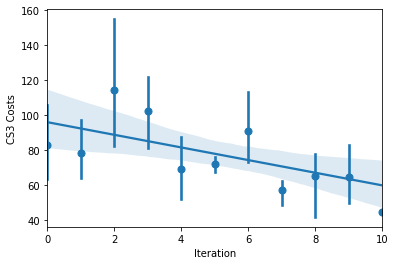

In [169]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS2 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "randomized_hill_climber"]
sns.regplot(x="Iteration", y="CS3 Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='CS3 Costs'>

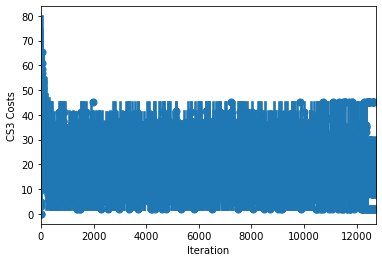

In [170]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS2 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "simmulated_annealing"]
sns.regplot(x="Iteration", y="CS3 Costs", data=df2, x_estimator=np.mean)

<AxesSubplot:xlabel='Iteration', ylabel='CS3 Costs'>

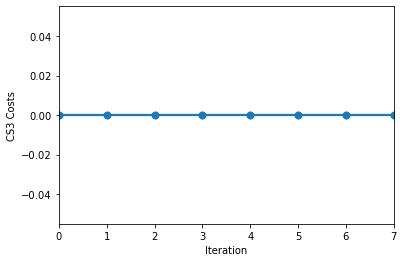

In [171]:
df2 = df.copy()
df2.drop(["Total Costs", "Basic Costs", "CS2 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "vdns"]
sns.regplot(x="Iteration", y="CS3 Costs", data=df2, x_estimator=np.mean)

## Total Costs

In [ ]:
fig, axs = plt.subplots()

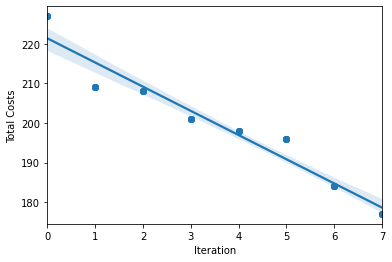

In [177]:
df2 = df.copy()
df2.drop(["CS2 Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df["Algorithm"] == "hill_climber"]
p = sns.regplot(x="Iteration", y="Total Costs", data=df2)
p.figure.savefig("plots/avg_hill_climber")

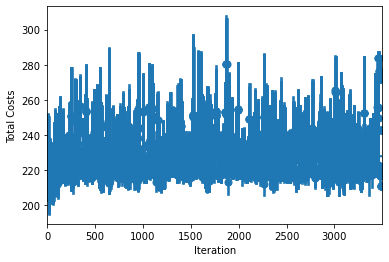

In [178]:
df2 = df.copy()
df2.drop(["CS2 Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "evolutionary"]
p = sns.regplot(x="Iteration", y="Total Costs", data=df2, x_estimator=np.mean)
p.figure.savefig("plots/avg_evolutionary")

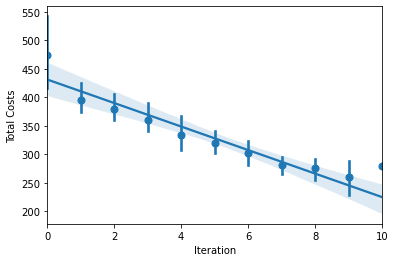

In [179]:
df2 = df.copy()
df2.drop(["CS2 Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "randomized_hill_climber"]
p = sns.regplot(x="Iteration", y="Total Costs", data=df2, x_estimator=np.mean)
p.figure.savefig("plots/avg_random_hill_climber")

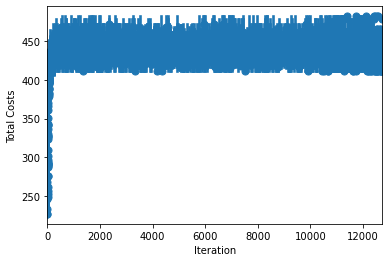

In [180]:
df2 = df.copy()
df2.drop(["CS2 Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "simmulated_annealing"]
p = sns.regplot(x="Iteration", y="Total Costs", data=df2, x_estimator=np.mean)
p.figure.savefig("plots/avg_simulated_annealing")

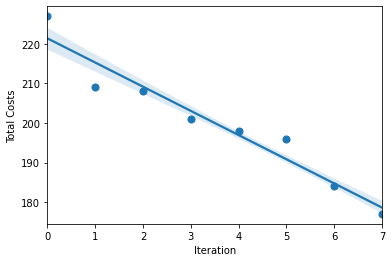

In [181]:
df2 = df.copy()
df2.drop(["CS2 Costs", "Basic Costs", "CS3 Costs"], axis=1, inplace=True)
df2 = df2.loc[df2["Algorithm"] == "vdns"]
p = sns.regplot(x="Iteration", y="Total Costs", data=df2, x_estimator=np.mean)
p.figure.savefig("plots/avg_vdns")

# Averages on many run WA*